In [ ]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#Import Dataset yang dibutuhkan
data = "/content/kc_house_data.csv"
dataset = pd.read_csv(data, usecols=['bedrooms', 'bathrooms', 
                                     'sqft_living', 'grade', 'price','yr_built'])

In [ ]:
#Melihat data teratas
#Dependent (y) = bedrooms, bathrooms, sqft_living, yrbuilt
#Independent (x) = price
dataset.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987


In [ ]:
#Bentuk Data
#Kolom = 6
#Baris = 21613
dataset.shape

(21613, 6)

In [ ]:
#Infromasi Data 
#jumlah Data, type data, dan memory yang digunakan
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   grade        21613 non-null  int64  
 5   yr_built     21613 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


In [ ]:
#Informasi deskripsi secara Statistik
#mean, kuartil, standar deviation, minimum, maximum, dll 
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,7.656873,1971.005136
std,3.671272e+05,0.930062,0.770163,918.440897,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,13.000000,2015.000000


In [ ]:
#Mengubah tipde data bathrooms dari float menjadi int
dataset['bathrooms'] = dataset['bathrooms'].astype('int')

In [ ]:
#Mengubah data bedrooms yang memiliki value 33 menjadi 3
dataset['bedrooms'] = dataset['bedrooms'].replace(33, 3)

In [ ]:
#Mencek apakah ada data yang kosong atau missing value
dataset.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
grade          0
yr_built       0
dtype: int64

In [ ]:
#Mengecek lagi data kita
dataset.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


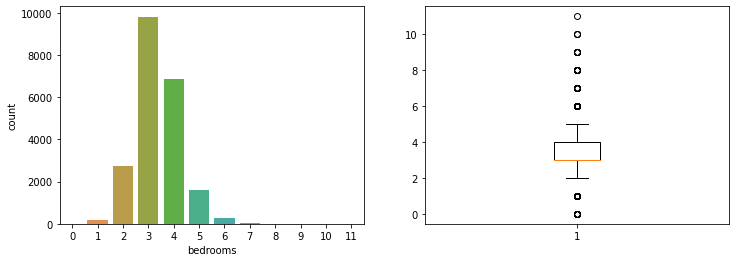

In [ ]:
#Visualisasi kolom bedrooms dengan grafik batang dan boxplot
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(dataset['bedrooms'])

f.add_subplot(1,2,2)
plt.boxplot(dataset['bedrooms'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


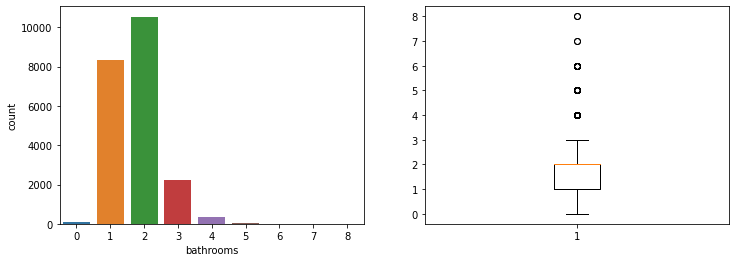

In [ ]:
#Visualisasi kolom bathrooms dengan grafik batang dan boxplot
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(dataset['bathrooms'])

f.add_subplot(1,2,2)
plt.boxplot(dataset['bathrooms'])
plt.show()

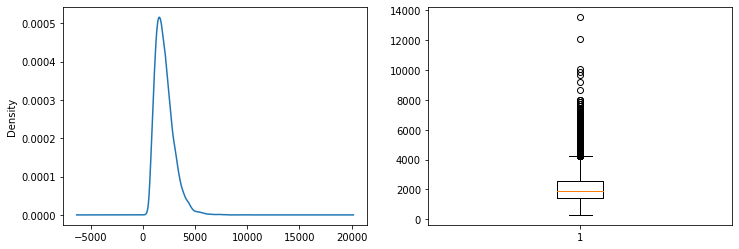

In [ ]:
#Visualisasi kolom sqft_living dengan grafik dan boxplot
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
dataset['sqft_living'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(dataset['sqft_living'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


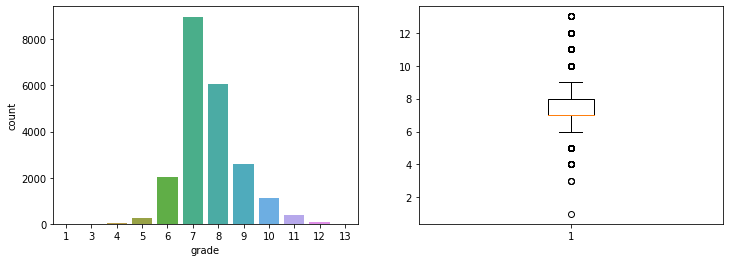

In [ ]:
#Visualisasi kolom grade dengan grafik batang dan boxplot
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(dataset['grade'])

f.add_subplot(1,2,2)
plt.boxplot(dataset['grade'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


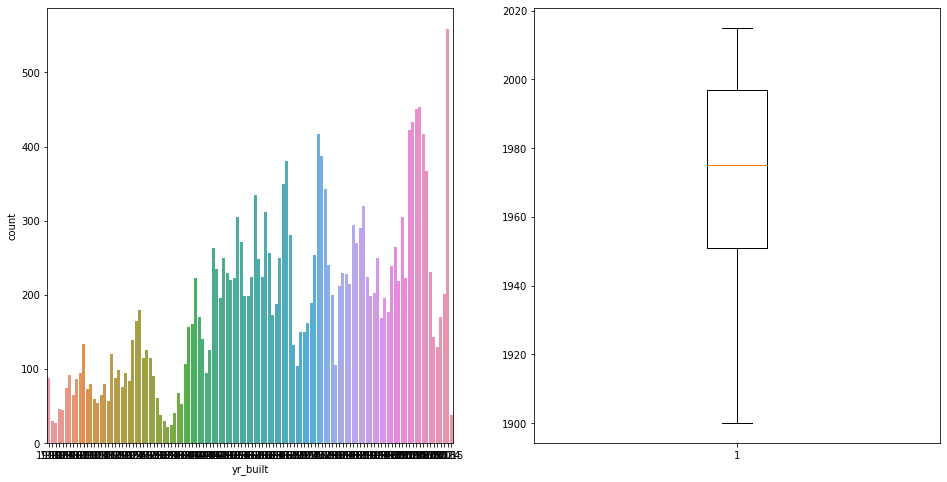

In [ ]:
#Visualisasi kolom yr_built dengan grafik batang dan boxplot
f = plt.figure(figsize=(16,8))

f.add_subplot(1,2,1)
sns.countplot(dataset['yr_built'])

f.add_subplot(1,2,2)
plt.boxplot(dataset['yr_built'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

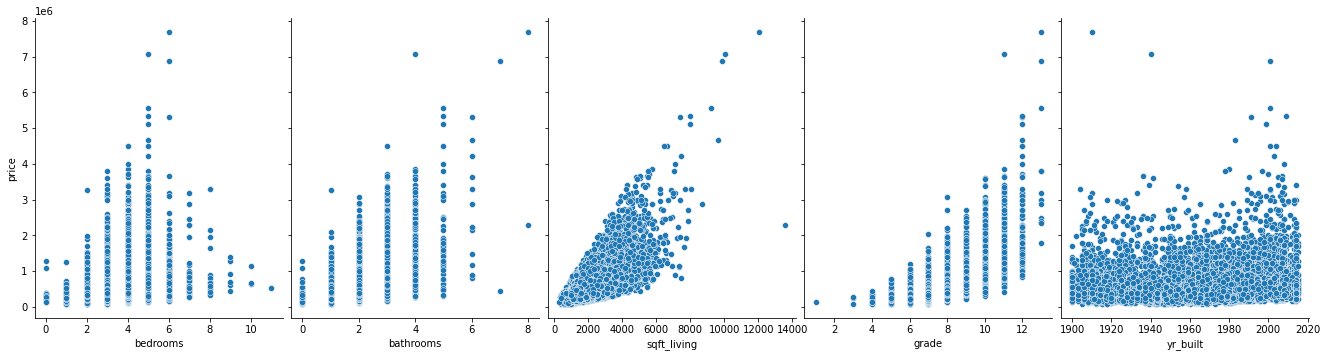

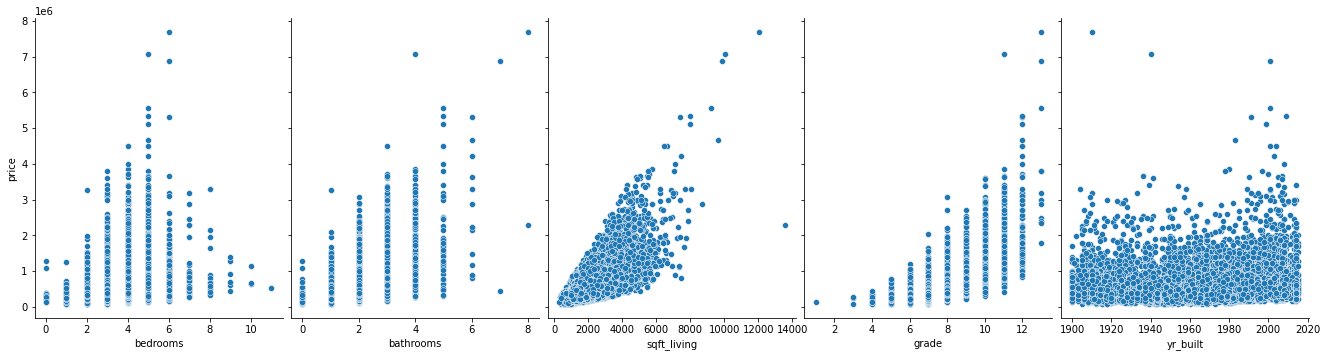

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(data=dataset, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built'], 
             y_vars=['price'], size=5, aspect=0.75)
sns.pairplot(data=dataset, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built'], 
             y_vars=['price'], size=5, aspect=0.75)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

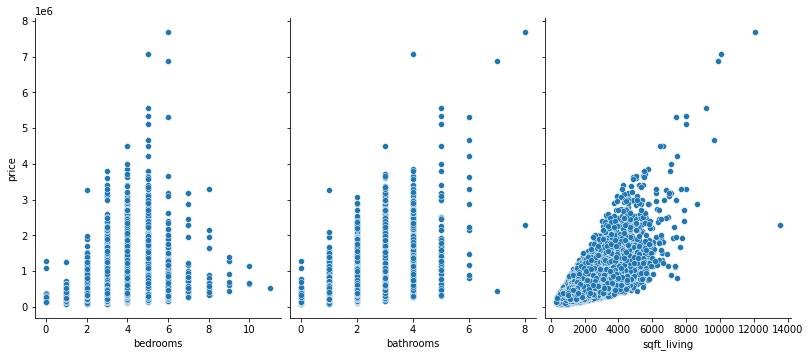

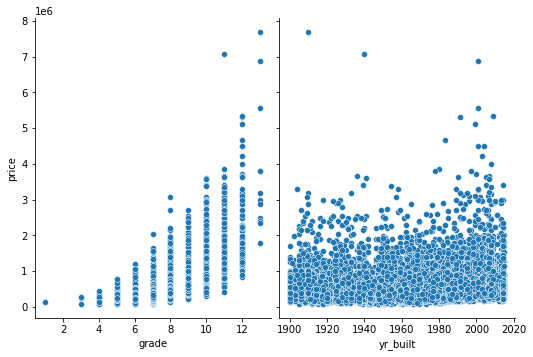

In [ ]:
#Visualisasi Perbandingan Variabel Dependent Dengan Independent
plt.figure(figsize=(10,5))

f.add_subplot(2,2,1)
sns.pairplot(data=dataset, x_vars=['bedrooms', 'bathrooms', 'sqft_living'], 
             y_vars=['price'], size=5, aspect=0.75)

f.add_subplot(2,2,3)
sns.pairplot(data=dataset, x_vars=['grade', 'yr_built'], 
             y_vars=['price'], size=5, aspect=0.75)
plt.show()

In [ ]:
#Cek kembali Data Kita
dataset.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


In [ ]:
#Membuat Variabel x dan y
x = dataset.drop(columns='price')
y = dataset['price']

In [ ]:
#Membagi menjadi model training dan model testing dengan prosinya 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [ ]:
#Cek Shape dari masing masing training dan testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17290, 5)
(17290,)
(4323, 5)
(4323,)


In [ ]:
#Membuat objek linear regression
lin_reg = LinearRegression()

In [ ]:
#Melakukan train terhadap model training yang udah displit tadi
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Mencari tahu nilai intercept(b)
print(lin_reg.intercept_)

7031568.245717696


In [ ]:
#membuat kedalam dataframe 
coef_dict = {
    'features': x.columns,
    'coef_value': lin_reg.coef_
} 
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,bedrooms,-53061.754643
1,bathrooms,64658.557906
2,sqft_living,188.909263
3,grade,131290.895368
4,yr_built,-3969.558315


In [ ]:
y_pred = lin_reg.predict(x_test)

In [ ]:
#Melihat akurasi dari model kita 
lin_reg.score(x_test,y_test)

0.61251132869411

In [ ]:
#Prediksi 
lin_reg.predict([[4,4,2800, 7, 2000]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([586821.03487834])

In [ ]:
import pickle

In [ ]:
filename = 'kchouse_model.pkl' 
pickle.dump(lin_reg, open(filename,'wb'))